In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [73]:
PATH_TO_BP = '/home/mmk/codes/spc23/train/BP'
PATH_TO_SZ = '/home/mmk/codes/spc23/train/SZ'

BP_folder_names = os.listdir(PATH_TO_BP)
SZ_folder_names = os.listdir(PATH_TO_SZ)
BP_folders_paths = [ os.path.join(PATH_TO_BP, x ) for x in BP_folder_names]
SZ_folders_paths = [ os.path.join(PATH_TO_SZ, x ) for x in SZ_folder_names]

print("total BP:", len(BP_folder_names))
print("total SZ:", len(SZ_folder_names))
TOTAL_ENTRIES = len(BP_folder_names) + len(SZ_folder_names)
print("Total_entries:", TOTAL_ENTRIES)

total BP: 183
total SZ: 288
Total_entries: 471


### Working with ICN_TC only

In [74]:
whole_icn_df = pd.DataFrame()

In [75]:
for i in range(len(BP_folders_paths)):

    icn_tc_array = np.load(os.path.join(BP_folders_paths[i], "icn_tc.npy"))
    icn_tc_df = pd.DataFrame(icn_tc_array)
    icn_tc_df["sub_num"] = BP_folder_names[i]
    
    whole_icn_df = pd.concat([whole_icn_df, icn_tc_df], axis=0)


for i in range(len(SZ_folders_paths)):

    icn_tc_array = np.load(os.path.join(SZ_folders_paths[i], "icn_tc.npy"))
    icn_tc_df = pd.DataFrame(icn_tc_array)
    icn_tc_df["sub_num"] = SZ_folder_names[i]
    
    whole_icn_df = pd.concat([whole_icn_df, icn_tc_df], axis=0)

column_names = [ f"col_{str(x)}" for x in range(105)]
column_names.append("sub_num")

whole_icn_df.columns = column_names

In [76]:
whole_icn_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,sub_num
0,2.142675,-9.466769,-32.811535,-9.539180,15.044387,46.701210,20.406616,-21.197741,18.122744,-4.984262,...,-55.630501,11.203014,10.224704,18.776464,-6.228551,-3.606162,49.082123,8.127570,-4.169737,sub539
1,-1.992527,8.763218,26.146837,16.924299,-42.283749,5.034009,-3.531894,9.774625,-1.745442,26.505699,...,40.193832,-16.258909,11.055941,-39.861279,14.198130,-8.589543,12.475738,-1.880062,43.424904,sub539
2,19.289589,2.507508,-5.998343,13.932196,-25.223511,4.916401,10.753822,-3.898231,11.170548,7.941632,...,-15.866105,16.314659,-9.041409,32.255096,19.143782,-0.345222,-0.657620,13.076051,1.782464,sub539
3,-26.297602,-18.162931,8.942274,12.609417,42.090271,19.154037,10.389113,-28.907078,-3.307630,12.984654,...,-32.727428,28.979624,-5.902945,45.198826,19.369705,-13.945653,3.678959,-5.640272,10.112800,sub539
4,-15.575743,0.620720,14.456755,8.562191,4.029899,9.685534,0.288745,-13.213937,-3.336134,15.695891,...,6.894574,1.526524,-21.597731,26.720644,3.554155,-14.234685,-12.198788,-4.834962,7.971312,sub539


In [79]:
def DisplayTimeSeries(sub_num, column):
    fig, ax = plt.subplots(figsize=(12,6))
    sub_df = whole_icn_df[whole_icn_df["sub_num"]==sub_num]
    sns.lineplot(data= sub_df, x= sub_df.index, y = column, ax = ax)
    ax.set_title(column)
    ax.set_ylim(-40,40)
    plt.plot()

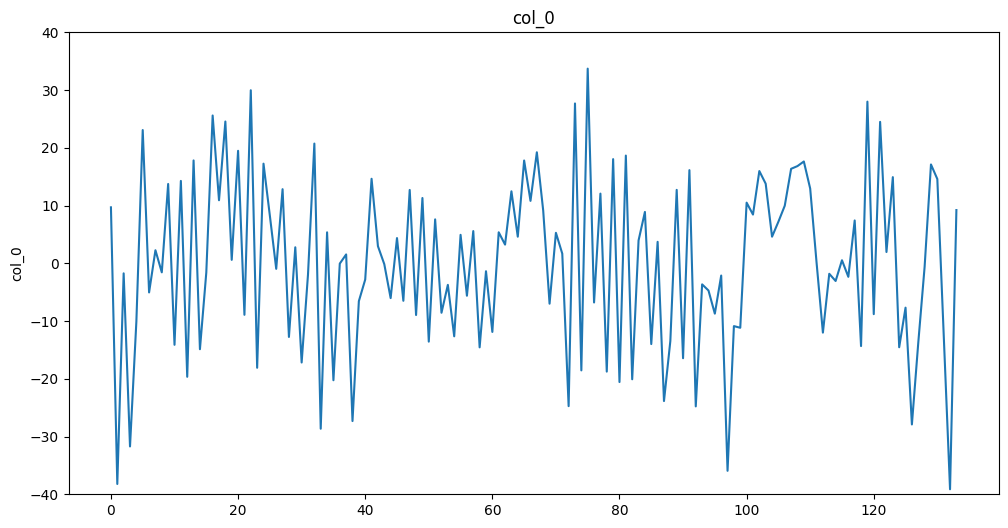

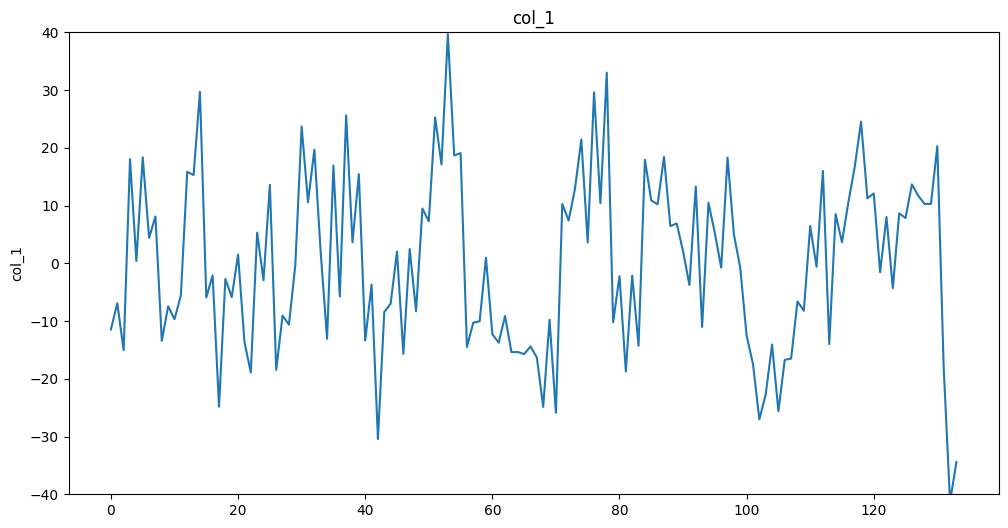

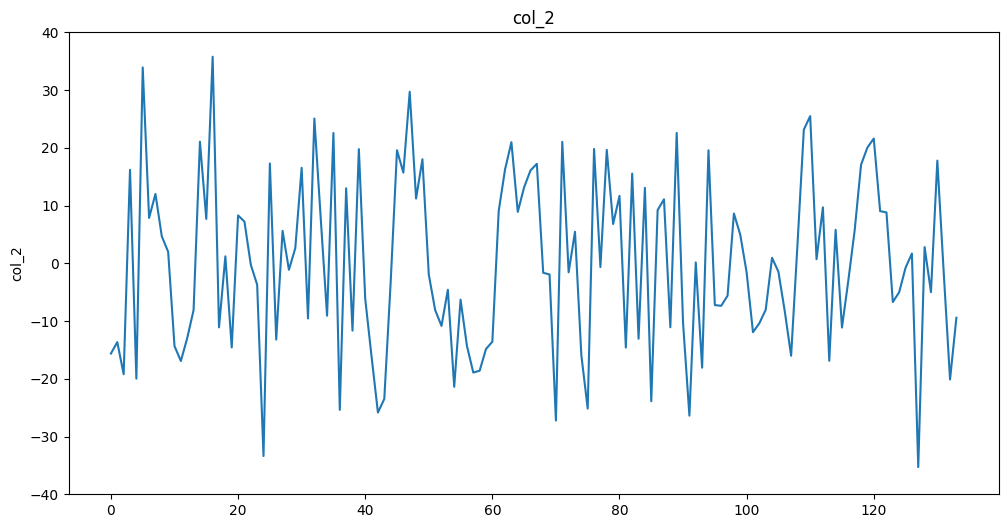

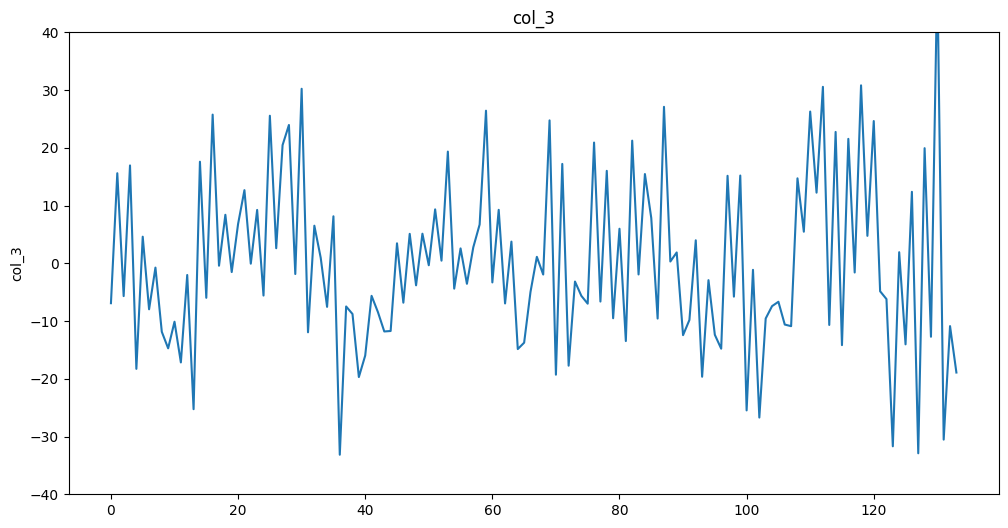

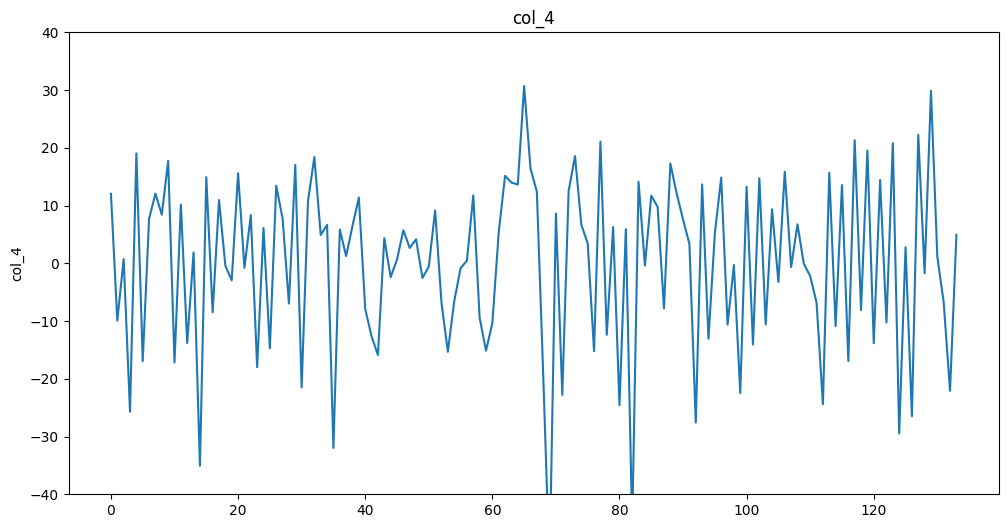

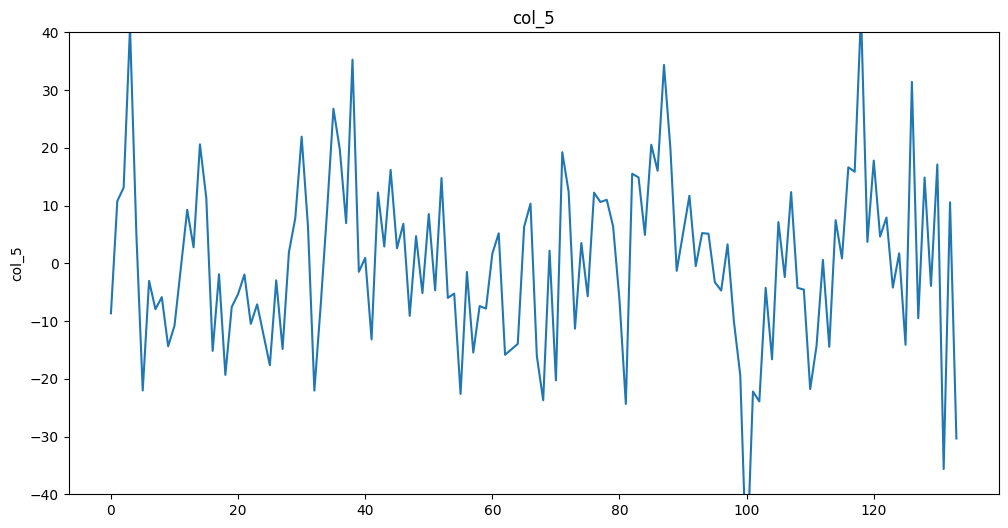

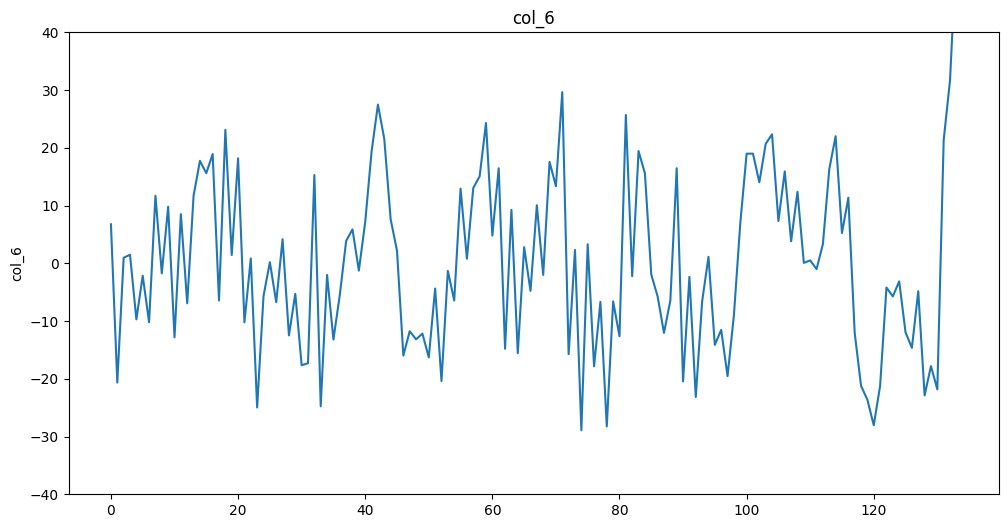

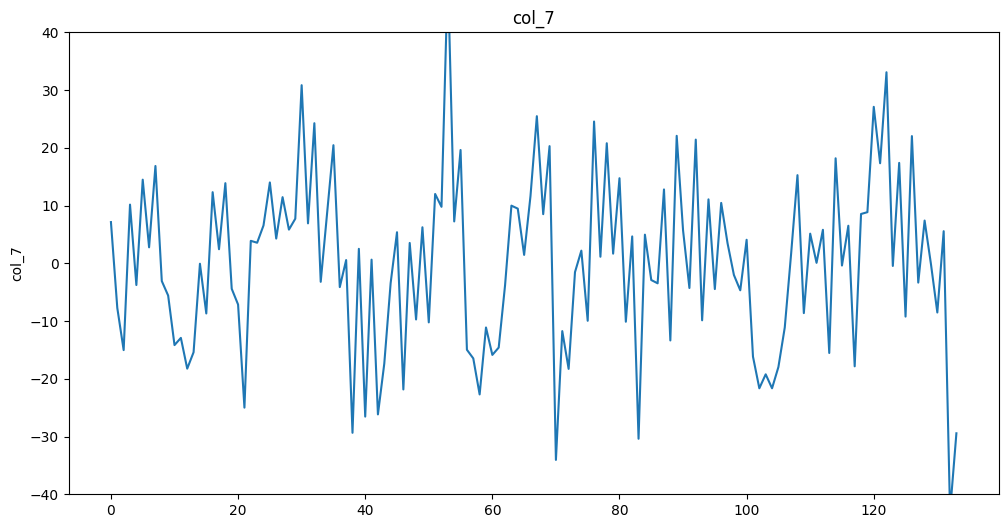

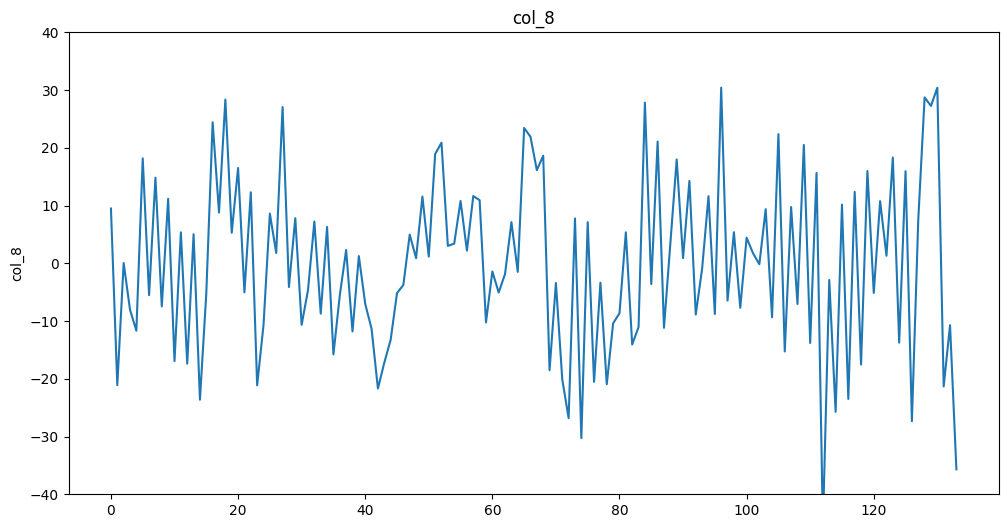

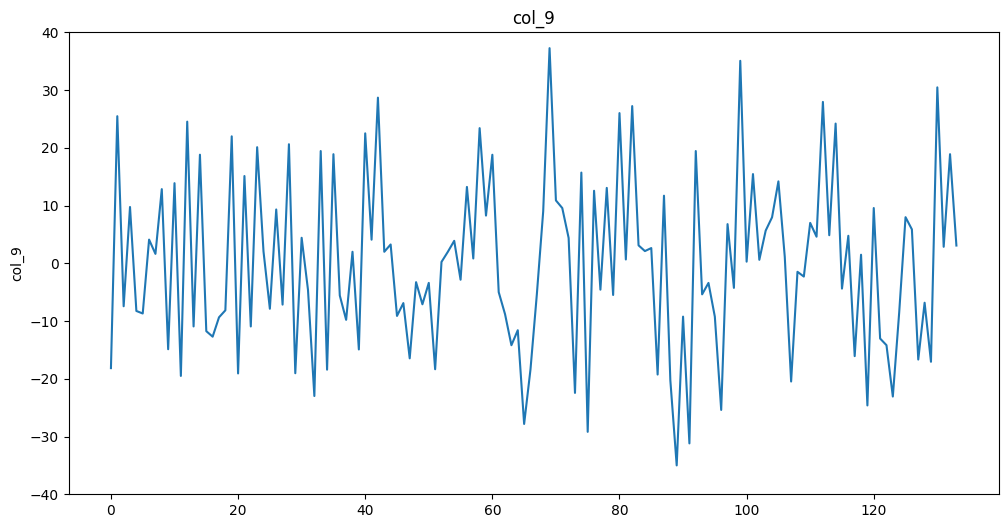

In [80]:
for i in range(10):
    col_name = "col_" + str(i)
    DisplayTimeSeries("sub006", col_name)

In [ ]:
# manually calculating correlation coefficients. 

for i in range(105):
    for j in range(105):
        col_name1 = "col_" + str(i) 
        col_name2 = "col_" + str(j) 